In [1]:
#loading libraries

import wget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In this homework, we will use the California Housing Prices data from Kaggle.


In [2]:
wget.download("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

'housing (1).csv'

In [3]:
# loading the data

data = pd.read_csv("housing.csv")
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Exploration

In [4]:
data.shape

(20640, 10)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


* The data has 20640 records and 10 features
* The data contains no duplicate records
* There are 207 NULL values in the total_bedrooms column 
* There are 9 numeric columns and 1 categorical column (object)


# Feature Engineering 

In [8]:
features_used =[
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity'
]

new_data = data[features_used]

new_data.sample(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20634,39.27,-121.56,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
403,37.90,-122.26,52.0,1927.0,279.0,705.0,288.0,7.8864,357300.0,NEAR BAY
17551,37.34,-121.86,29.0,5274.0,1625.0,6234.0,1639.0,2.5947,177300.0,<1H OCEAN


From the data exploration section,

* total_bedrooms column has 207 missing values 

Solution for this homework - fill nulls with 0

In [9]:
new_data['total_bedrooms'] = new_data['total_bedrooms'].fillna(0)

In [10]:
new_data.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [11]:
new_data['rooms_per_household'] = new_data['total_rooms']/new_data['households']

new_data.sample(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
3141,34.86,-118.17,21.0,2370.0,540.0,1488.0,554.0,2.7361,83300.0,INLAND,4.277978
13053,38.60,-121.30,32.0,9534.0,1819.0,4951.0,1710.0,3.3926,103400.0,INLAND,5.575439
9549,37.43,-120.84,32.0,2892.0,521.0,1580.0,484.0,3.7784,164500.0,INLAND,5.975207


Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [12]:
new_data['bedrooms_per_room'] = new_data['total_bedrooms']/new_data['total_rooms']

new_data.sample(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
11267,33.80,-117.97,35.0,2985.0,474.0,1614.0,453.0,5.4631,225600.0,<1H OCEAN,6.589404,0.158794
11092,33.81,-117.87,15.0,3082.0,536.0,1268.0,531.0,3.7604,280100.0,<1H OCEAN,5.804143,0.173913
4402,34.09,-118.28,49.0,3828.0,1197.0,2862.0,1009.0,2.4677,219200.0,<1H OCEAN,3.793855,0.312696


Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [13]:
new_data['population_per_household'] = new_data['population']/new_data['households']

new_data.sample(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
4482,34.06,-118.19,32.0,555.0,159.0,748.0,163.0,1.9762,137500.0,<1H OCEAN,3.404908,0.286486,4.588957
13379,34.14,-117.61,14.0,15809.0,2485.0,7363.0,2410.0,5.5198,245600.0,INLAND,6.559751,0.157189,3.055187
19379,37.77,-120.87,9.0,4838.0,920.0,2460.0,923.0,3.5959,142700.0,INLAND,5.241603,0.190161,2.665222


# QUESTION 1

What is the most frequent observation (mode) for the column ocean_proximity?

In [14]:
new_data['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [15]:
new_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# QUESTION 2

Create the correlation matrix for the numerical features of your train dataset.
        
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
        
What are the two features that have the biggest correlation in this dataset?


In [16]:
numeric_features =['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'
       , 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']

categorical_features ='ocean_proximity'

In [17]:
corr_train = new_data[numeric_features].corr()

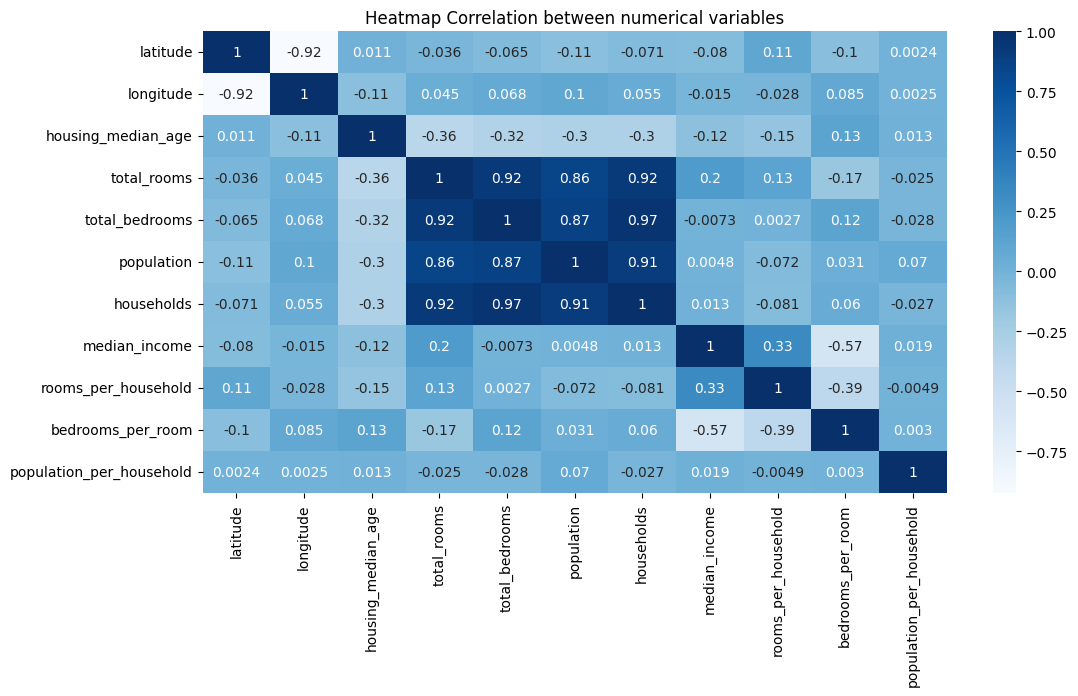

In [18]:
plt.figure(figsize =[12,6])
sns.heatmap(corr_train, annot=True,cmap='Blues')
plt.title('Heatmap Correlation between numerical variables');

The highest correlation observed was 0.97 which is between households and total_bedrooms

Make median_house_value binary

* We need to turn the median_house_value variable from numeric into binary.
* Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [19]:
mean_col = new_data['median_house_value'].mean()

new_data['above_average'] = (new_data['median_house_value'] > mean_col).astype('int')

In [20]:
new_data.sample(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
9228,36.98,-120.21,21.0,1667.0,303.0,861.0,276.0,2.6012,92200.0,INLAND,6.039855,0.181764,3.119565,0
12808,38.63,-121.47,29.0,2197.0,520.0,1374.0,483.0,2.1889,69300.0,INLAND,4.548654,0.236686,2.844720,0
6261,34.04,-117.96,35.0,1141.0,212.0,924.0,212.0,3.1591,148300.0,<1H OCEAN,5.382075,0.185802,4.358491,0
3829,34.19,-118.46,20.0,5992.0,1820.0,4826.0,1632.0,2.7237,233500.0,<1H OCEAN,3.671569,0.303738,2.957108,1
1681,38.03,-122.36,32.0,2159.0,393.0,981.0,369.0,4.3173,175400.0,NEAR BAY,5.850949,0.182029,2.658537,0


### Splitting the Data

In [21]:
#loading libraries

from sklearn.model_selection import train_test_split

#splitting the data into train,test subsets

df_full_train, df_test = train_test_split(new_data, test_size = 0.2, random_state= 42)

In [22]:
df_full_train.shape,df_test.shape

((16512, 14), (4128, 14))

In [23]:
#getting the val set from the train set 

#since the val set must be 20% from the original data, getting the val set from the train set requires a new computation of the size to obtain from the train set

val_size = 20/80 

df_train, df_val = train_test_split(df_full_train, test_size = val_size, random_state= 42)

In [24]:
for set in [df_train,df_val,df_test]:
    set.reset_index(drop=True,inplace=True)

In [25]:
df_train.shape,df_val.shape,df_test.shape

((12384, 14), (4128, 14), (4128, 14))

### Splitting each subset into X feature matrix and y vector 

In [26]:
target = 'above_average'
col_drop = 'median_house_value'

X_train, y_train = df_train.drop(columns = [target,col_drop]), df_train[target]
X_val, y_val = df_val.drop(columns = [target,col_drop]), df_val[target]
X_test, y_test = df_test.drop(columns = [target,col_drop]), df_test[target]

In [27]:
X_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [28]:
X_train.shape,y_train.shape

((12384, 12), (12384,))

In [29]:
X_val.shape, y_val.shape

((4128, 12), (4128,))

In [30]:
X_test.shape,y_test.shape

((4128, 12), (4128,))

Finding the mean median_house_value

In [31]:
avg_median_house_val = y_train.mean()

print(f"{round(avg_median_house_val,2)*100}%  of the houses in the data set are above the average median house value")

41.0%  of the houses in the data set are above the average median house value


# Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using round(score, 2)

In [32]:
from sklearn.metrics import mutual_info_score

round(mutual_info_score(y_train,X_train[categorical_features]),2)

0.1

# Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
* To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
* model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.


In [33]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

In [34]:
dict_Xtrain = X_train.to_dict(orient='records')

dict_Xtrain = dv.fit_transform(dict_Xtrain)

dict_Xtrain[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

In [35]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [36]:
from sklearn.linear_model import LogisticRegression

lr =  LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

lr.fit(dict_Xtrain, y_train)



LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
dict_Xval = X_val.to_dict(orient='records')

dict_Xval = dv.transform(dict_Xval)

dict_Xval[0]

array([ 1.59529807e-01,  1.82000000e+02,  3.50000000e+01,  3.67400000e+01,
       -1.19850000e+02,  3.53750000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.37000000e+02,
        2.95054945e+00,  6.54395604e+00,  1.90000000e+02,  1.19100000e+03])

In [38]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [39]:
y_pred = lr.predict(dict_Xval)

In [40]:
acc = (y_val == y_pred).mean()

round(acc,2)

0.84

In [41]:
from sklearn.metrics import accuracy_score


original_acc = accuracy_score(y_val, y_pred)

round(original_acc,2 )

0.84

# Question 5

* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?

In [42]:


col_list =[]
acc_list = []
diff_list = []

dict_l={}

for column in X_train.columns:

    col_list.append(column)
    Xt_train = X_train.drop(columns = [column])

    dictXtrain = Xt_train.to_dict(orient = 'records')

    dictXtrain = dv.fit_transform(dictXtrain)
    lr =  LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    
    lr.fit(dictXtrain,y_train)

    Xt_val = X_val.drop(columns = [column])

    dictXval = X_val.to_dict(orient = 'records')
    dictXval = dv.transform(dictXval)

    y_pred = lr.predict(dictXval)

    acc = accuracy_score(y_val, y_pred)
    acc_list.append(acc)

    diff = abs(original_acc - acc)
    diff_list.append(diff)

dict_l['column_removed'] = col_list
dict_l['accuracy'] = acc_list
dict_l['difference'] = diff_list

df_acc = pd.DataFrame(dict_l)

df_acc

,column_removed,accuracy,difference
0,latitude,0.834060,0.002180
1,longitude,0.833091,0.003149
2,housing_median_age,0.830911,0.005329
3,total_rooms,0.836483,0.000242
4,total_bedrooms,0.835271,0.000969
5,population,0.826308,0.009932
6,households,0.833333,0.002907
7,median_income,0.786337,0.049903
8,ocean_proximity,0.820252,0.015988
9,rooms_per_household,0.836483,0.000242


# Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
* This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

In [43]:
target = 'median_house_value'
col_drop = 'above_average'

X_train, y_train = df_train.drop(columns = [target,col_drop]), df_train[target]
X_val, y_val = df_val.drop(columns = [target,col_drop]), df_val[target]
X_test, y_test = df_test.drop(columns = [target,col_drop]), df_test[target]

In [44]:
X_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [45]:
#log transforming y_train,y_val,y_test

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [46]:
#onehot encoding X feature matrix 

dict_Xtrain = X_train.to_dict(orient='records')
dict_Xtrain = dv.fit_transform(dict_Xtrain)

dict_Xval = X_val.to_dict(orient='records')
dict_Xval = dv.transform(dict_Xval)




In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)

    model.fit(dict_Xtrain, y_train)

    y_pred = model.predict(dict_Xval)

    rmse = np.sqrt(mean_squared_error(y_val,y_pred))

    rmse = round(rmse, 3)

    print(a, ": " , rmse)

0 :  0.524
0.01 :  0.524
0.1 :  0.524
1 :  0.524
10 :  0.524
